Исследовательский анализа данных (EDA)

In [2]:
import pandas as pd

data = pd.read_csv("HR-Employee-Attrition.csv")
print(data.head())
print(data.info())
print(data.describe())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

Шаг 3: Анализ распределения признаков

Числовые признаки

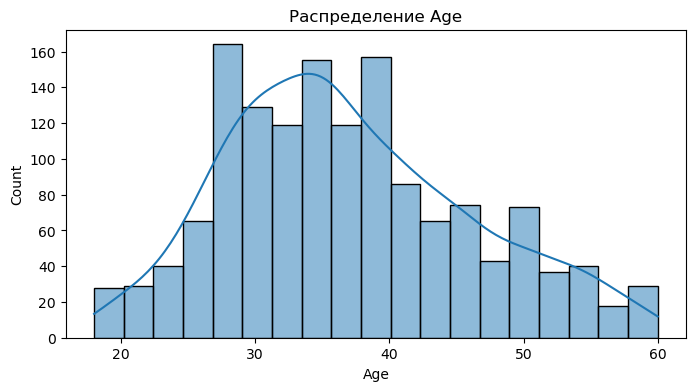

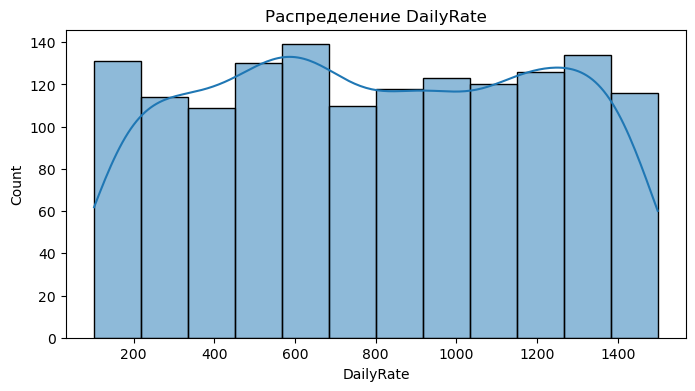

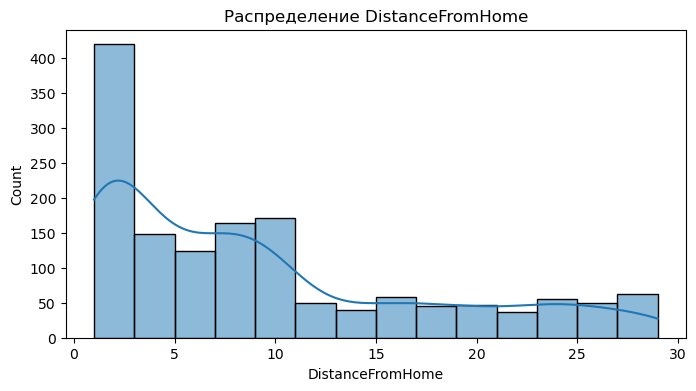

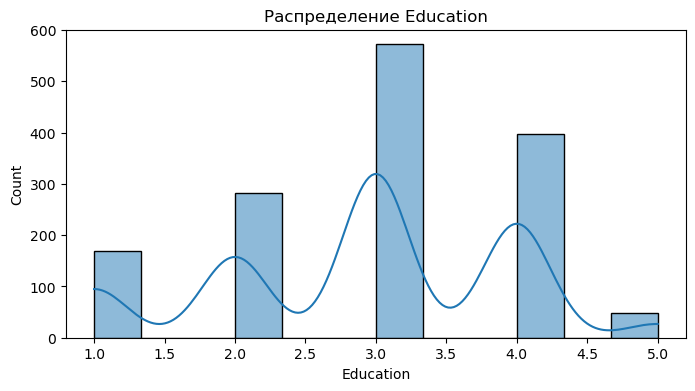

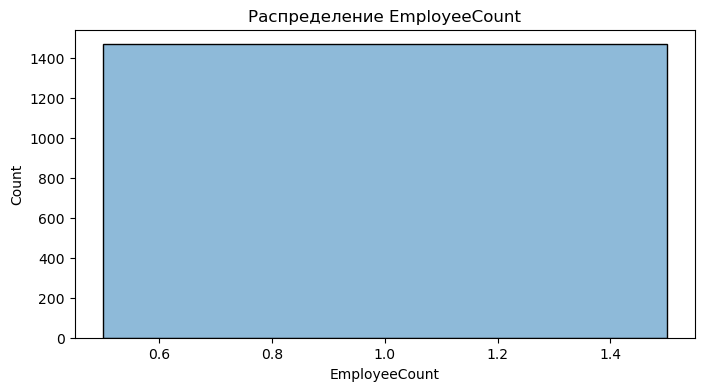

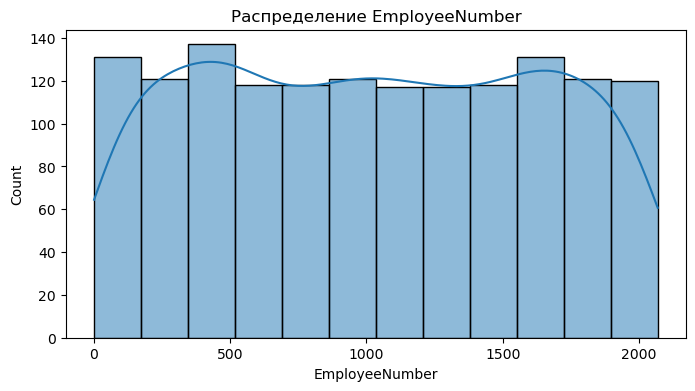

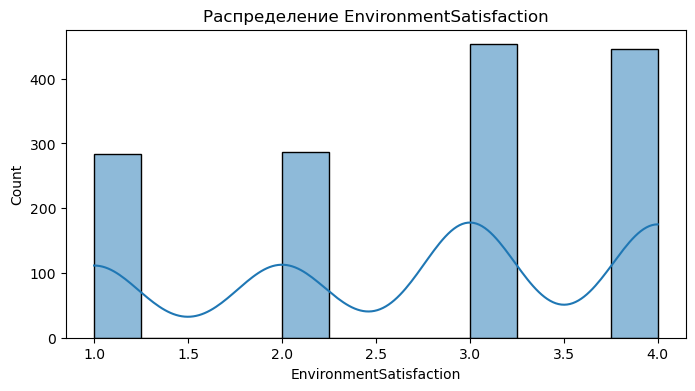

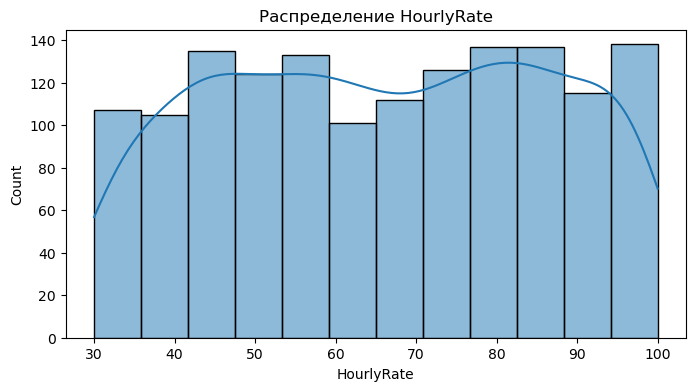

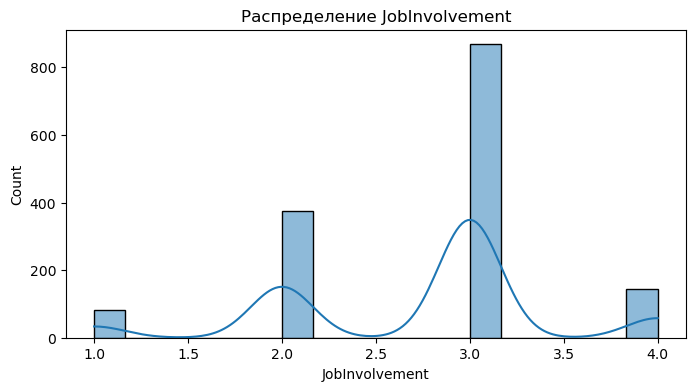

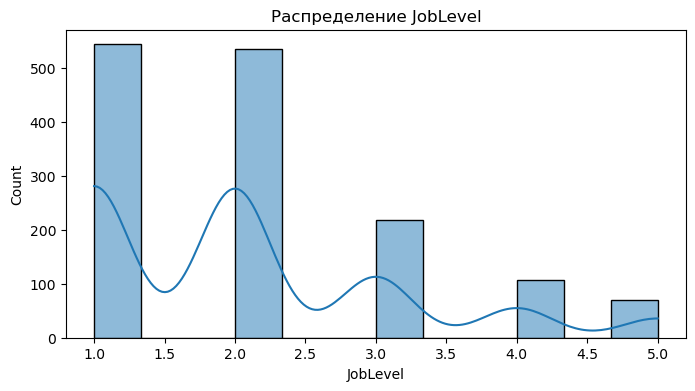

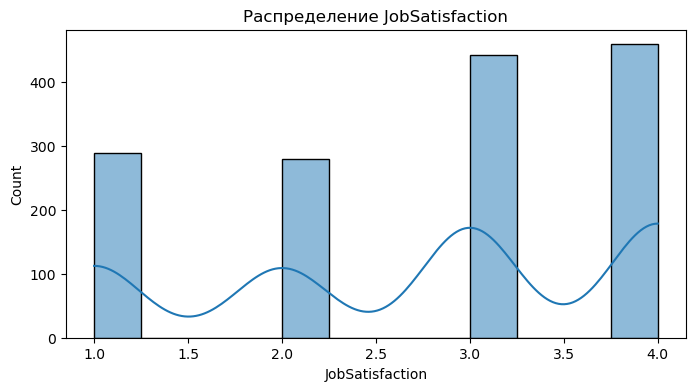

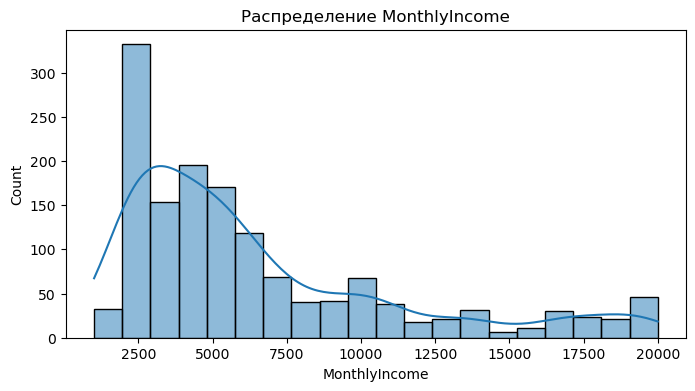

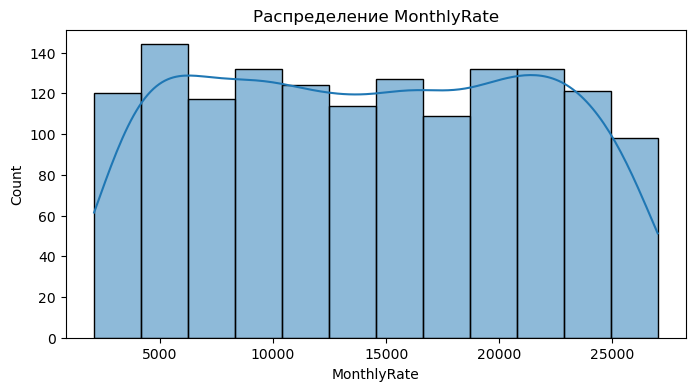

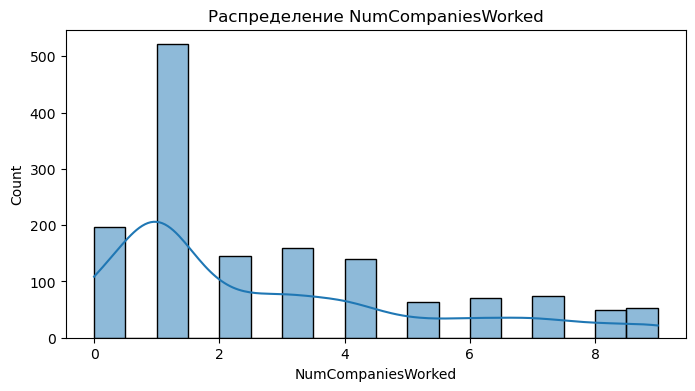

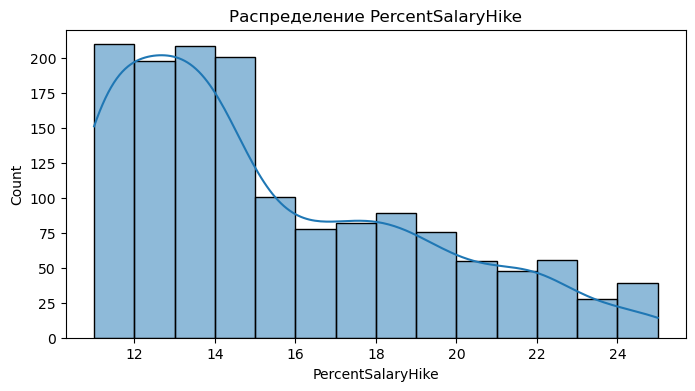

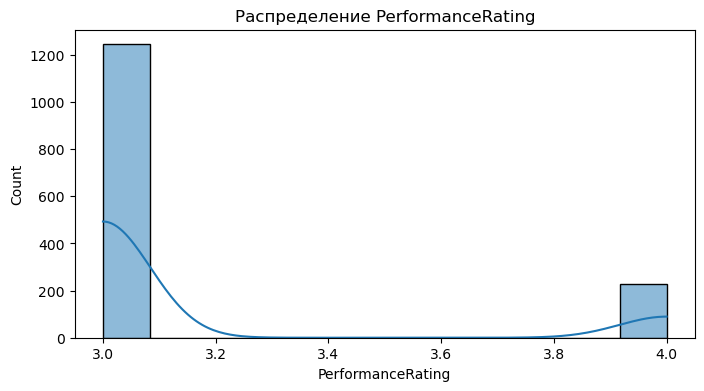

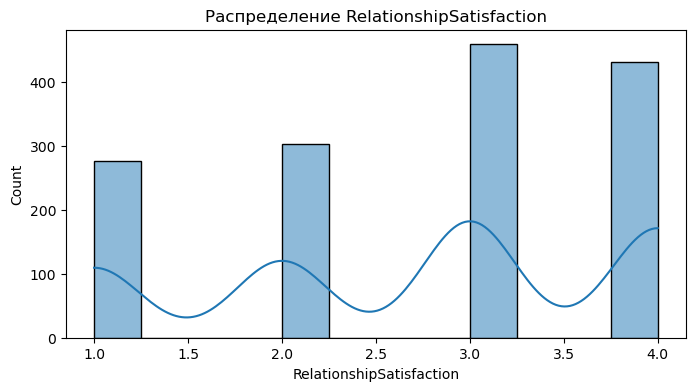

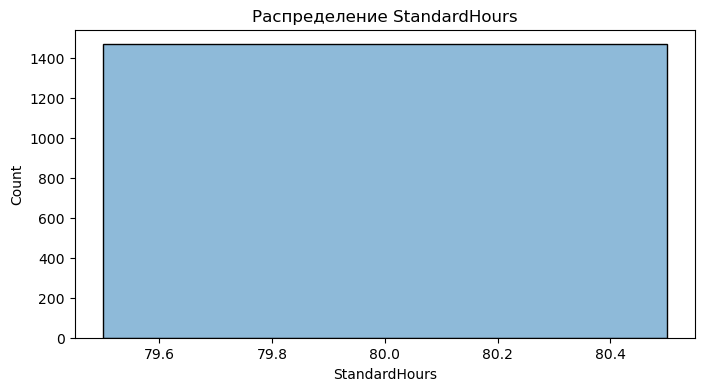

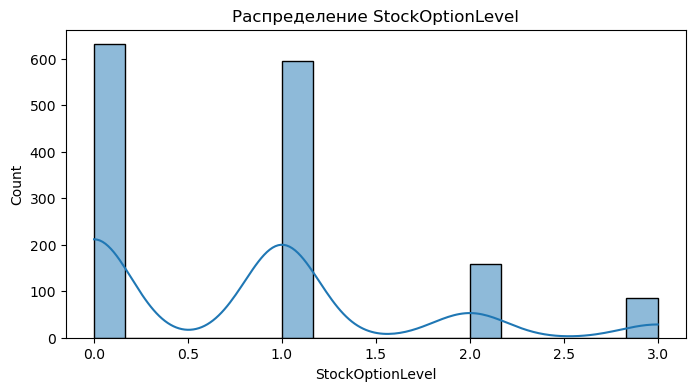

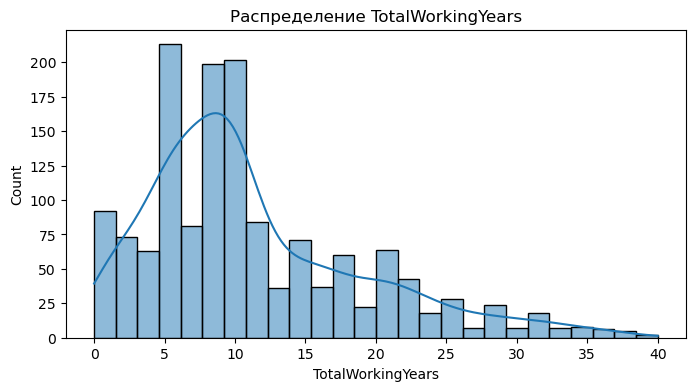

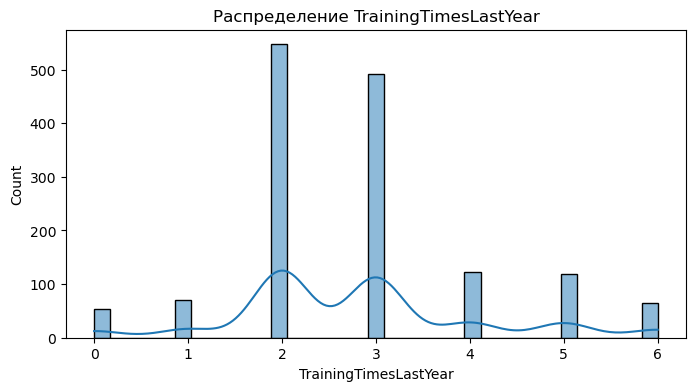

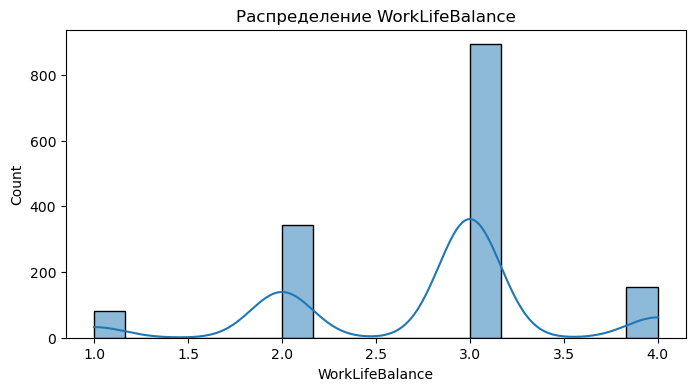

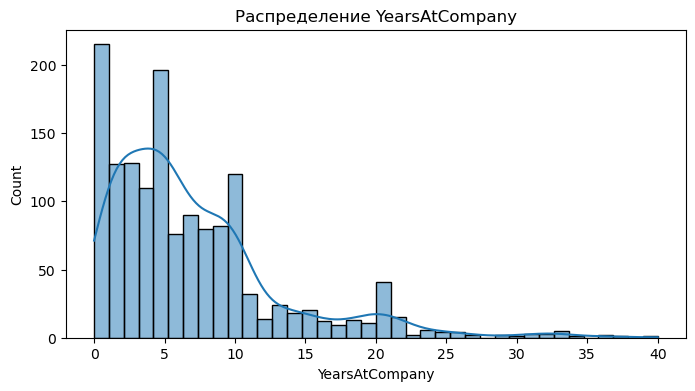

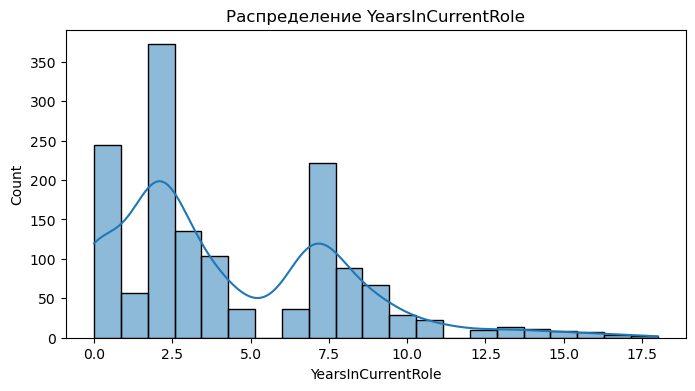

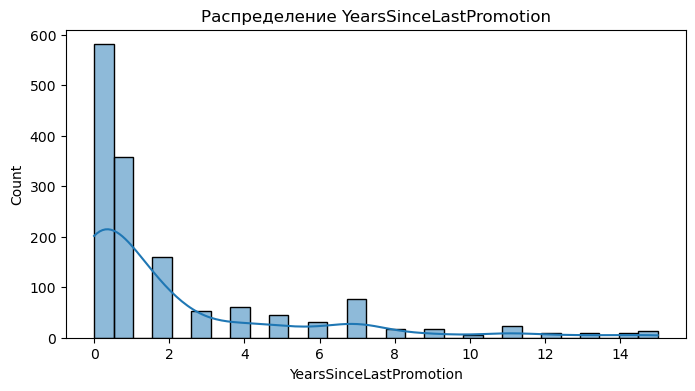

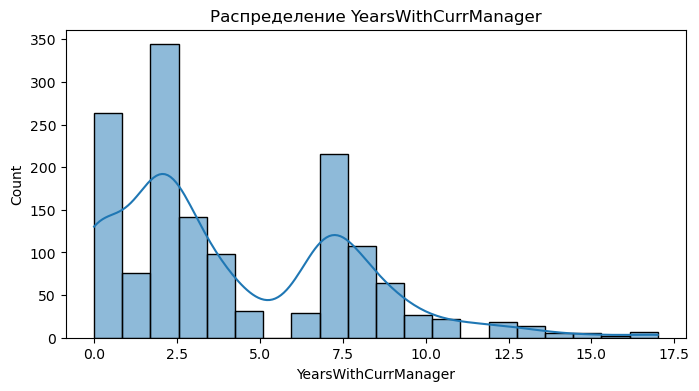

In [4]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Распределение {feature}')
    plt.show()

Категориальные признаки

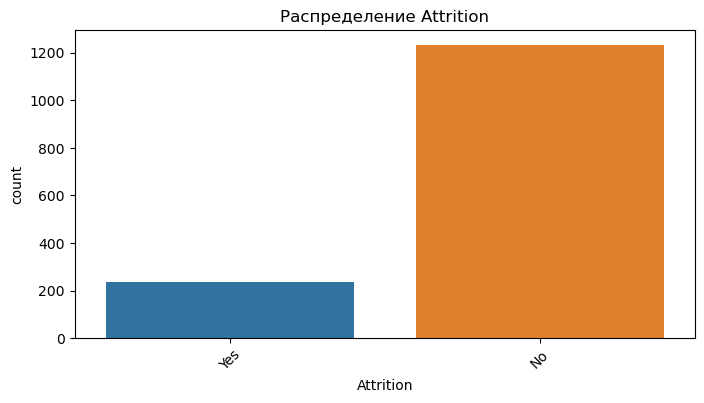

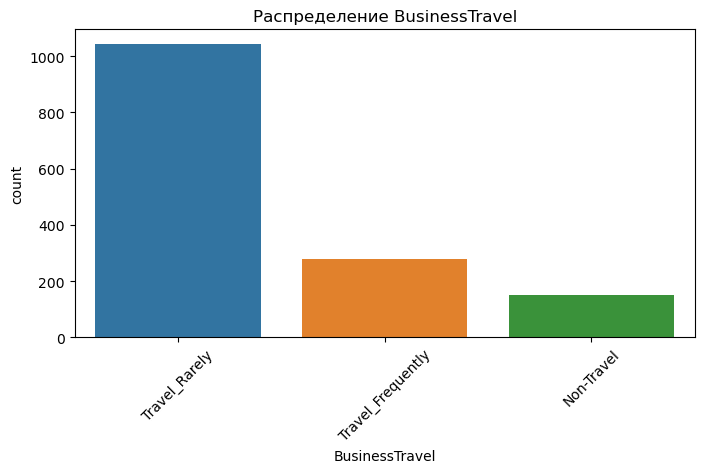

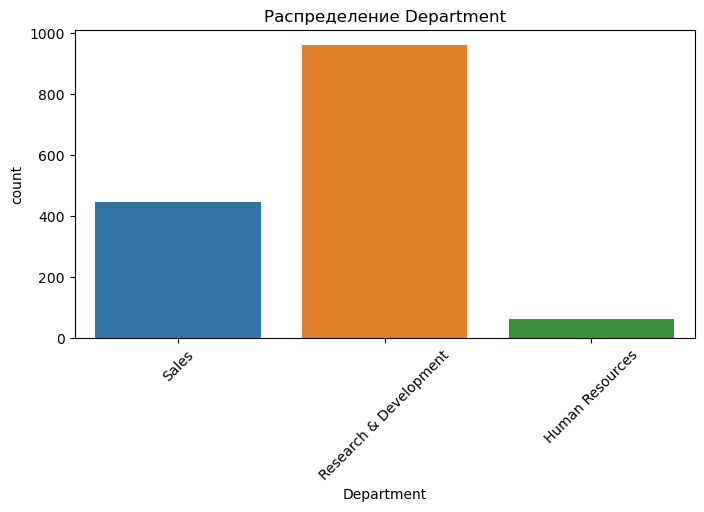

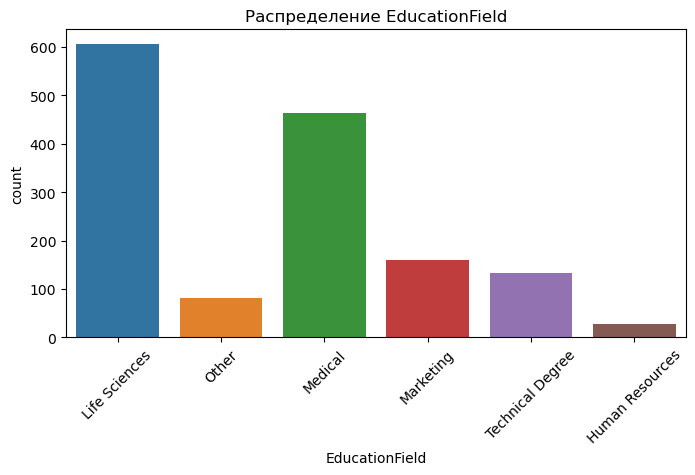

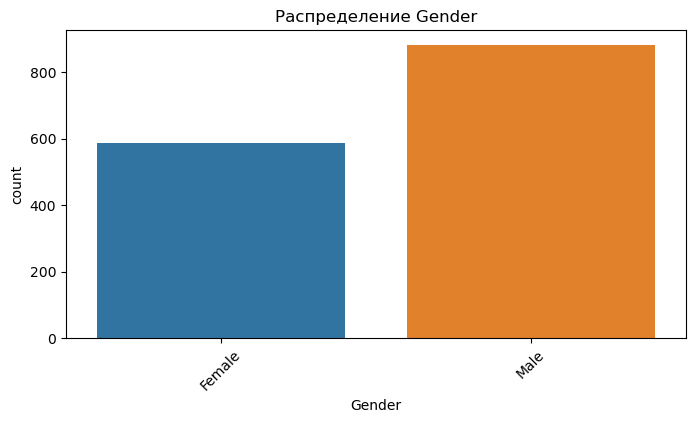

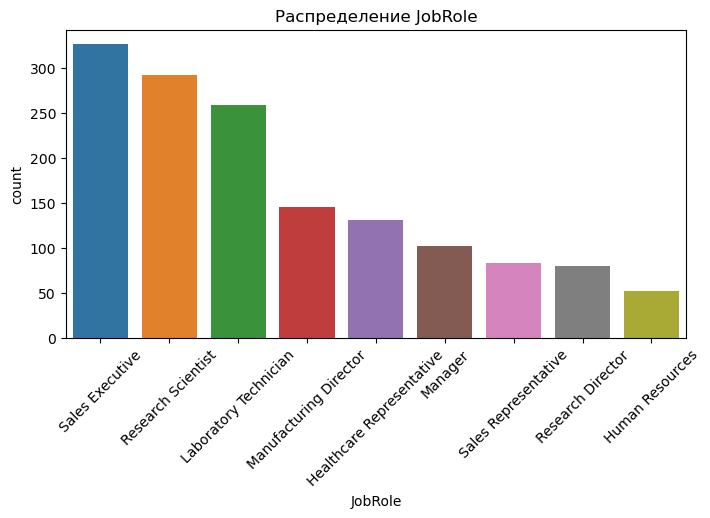

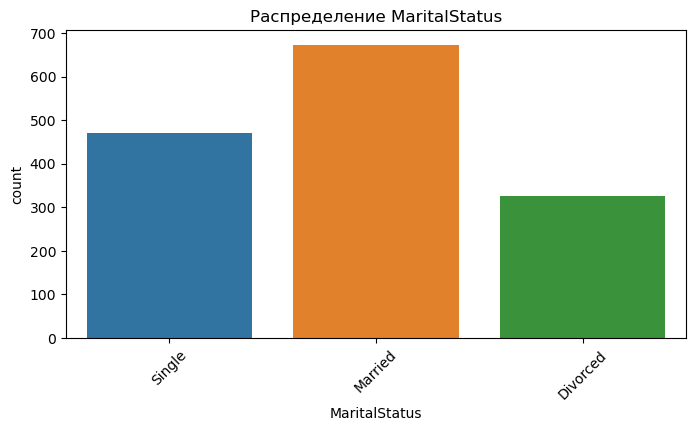

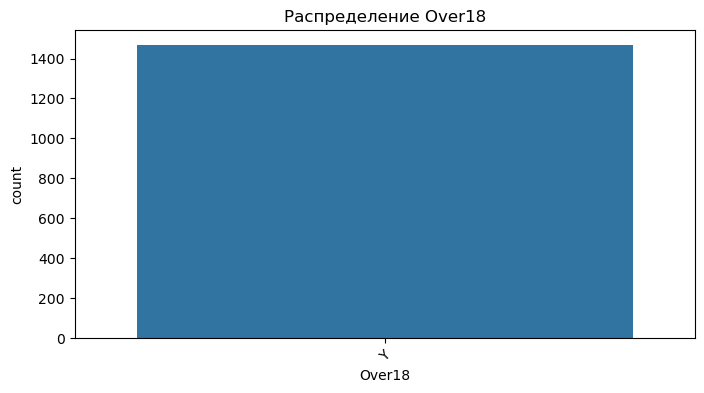

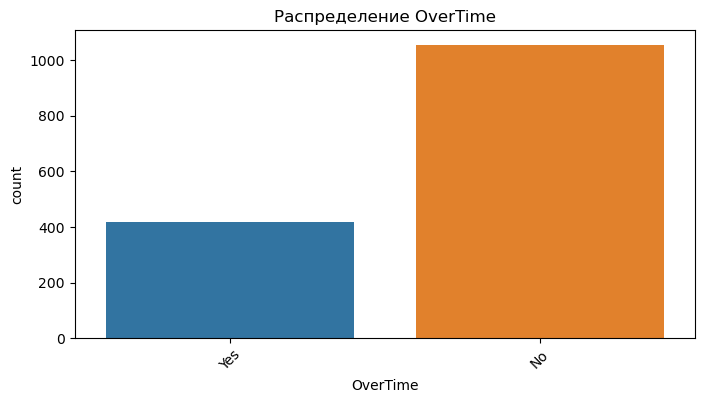

In [5]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Распределение {feature}')
    plt.xticks(rotation=45)
    plt.show()

Шаг 4: Анализ целевой переменной attrition
Дисбаланс класов

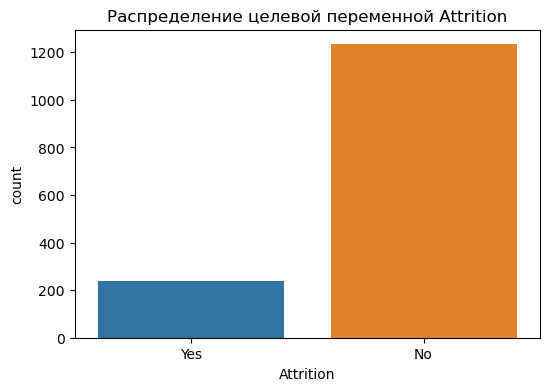

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Attrition')
plt.title('Распределение целевой переменной Attrition')
plt.show()

attrition_counts = data['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)

Шаг 5: Анализ зависимостей между признаками и целевой переменной
Числовые признаки vs Attrition

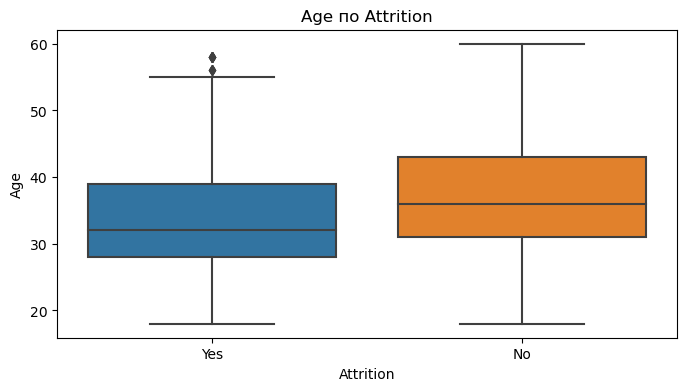

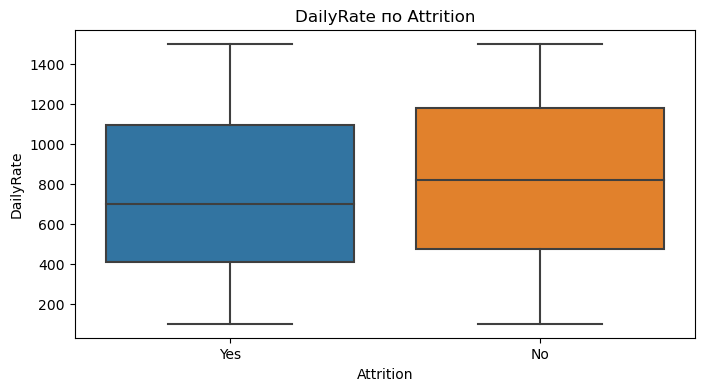

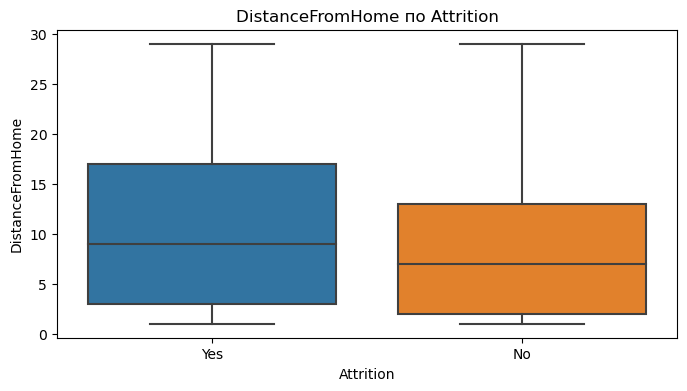

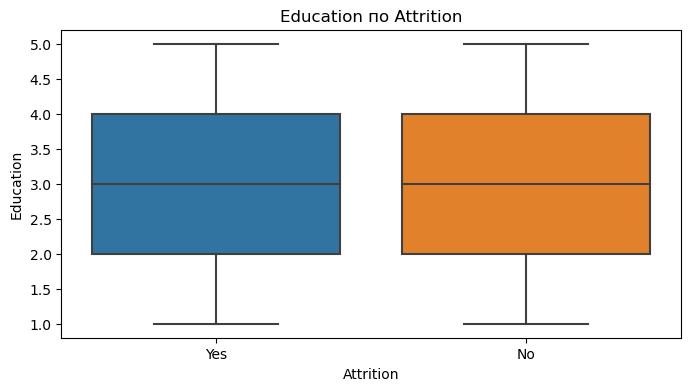

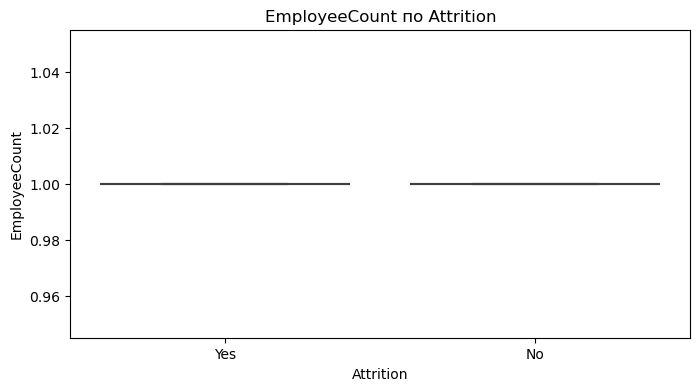

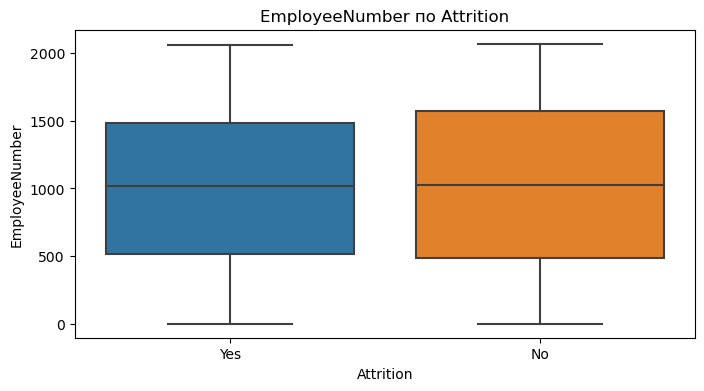

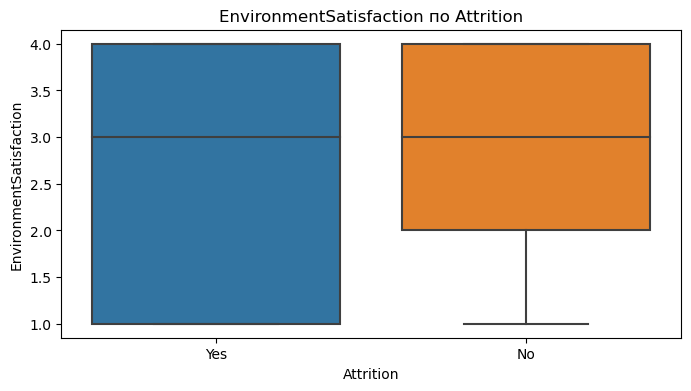

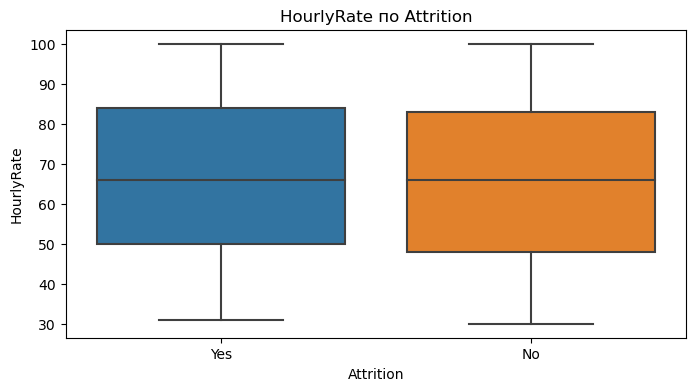

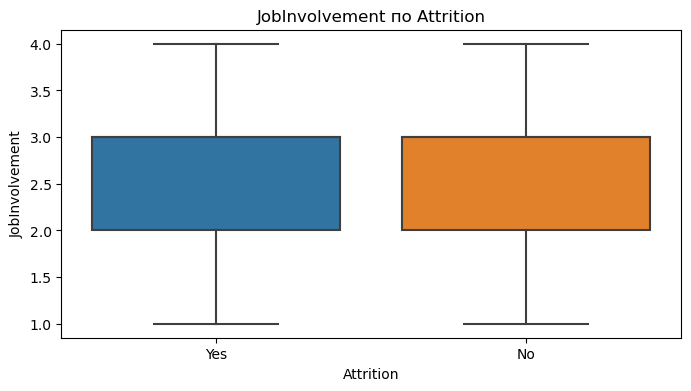

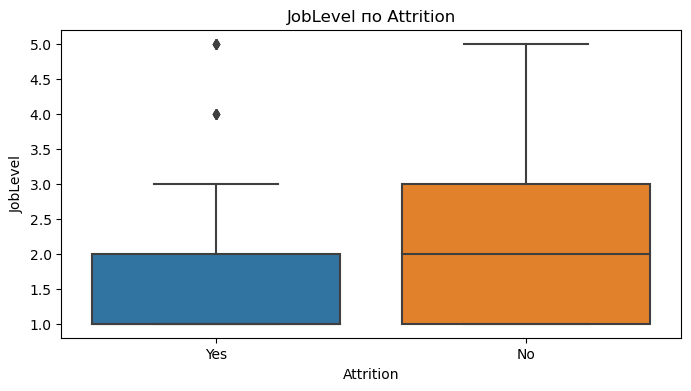

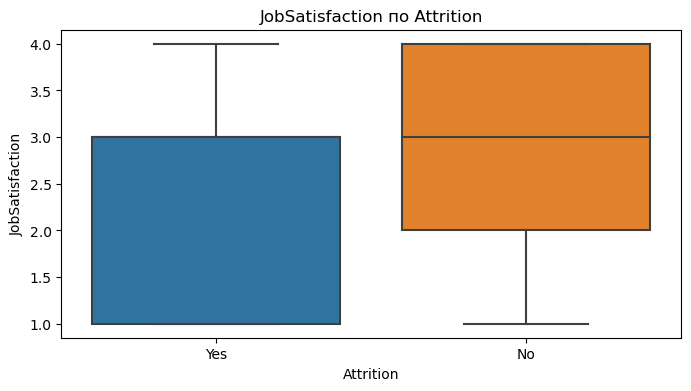

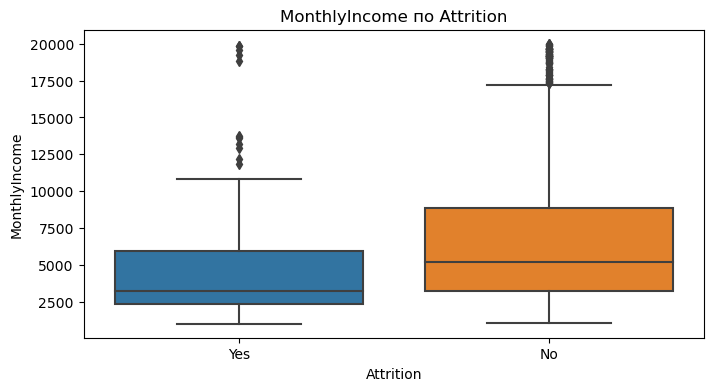

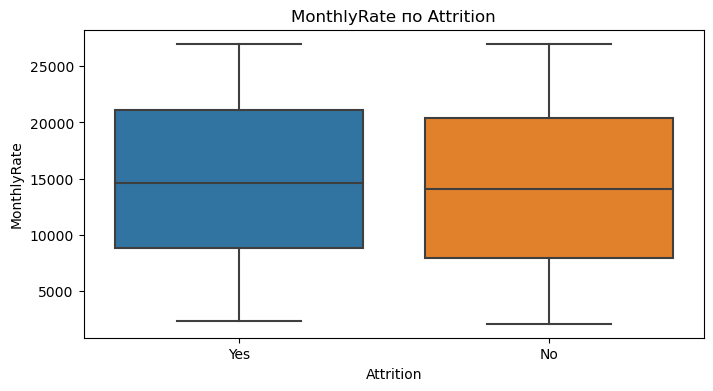

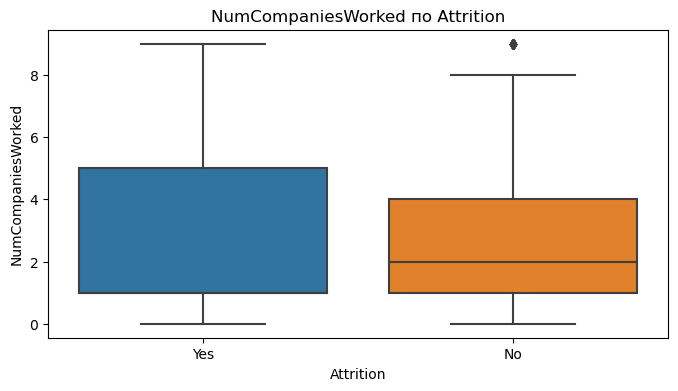

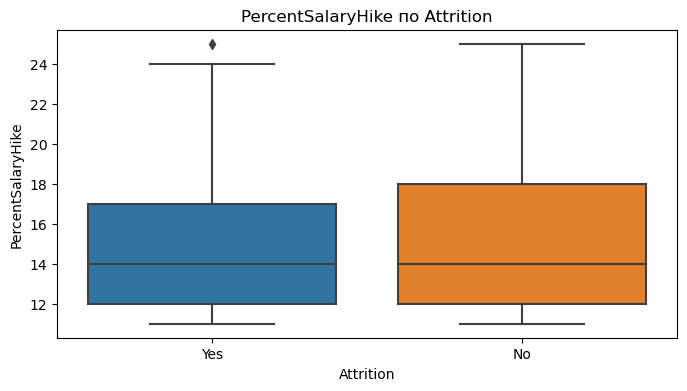

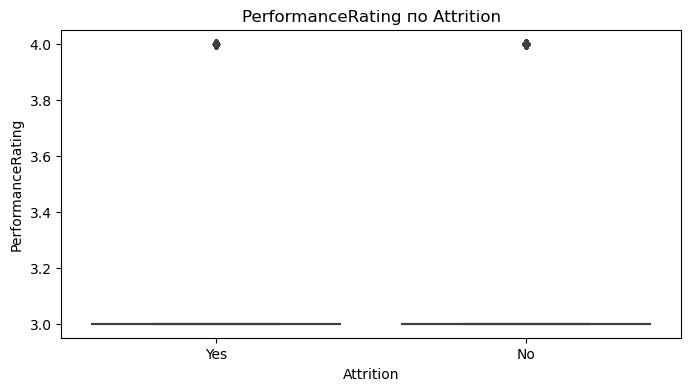

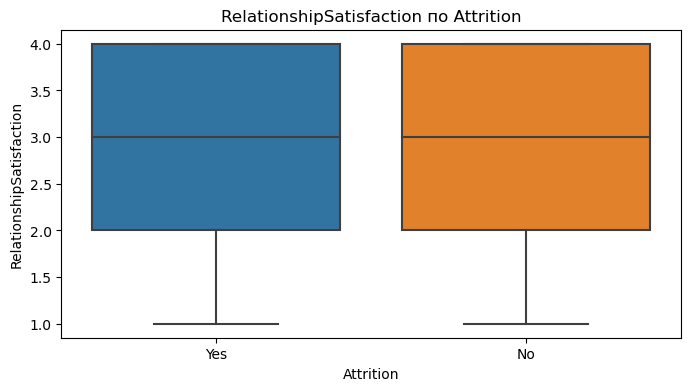

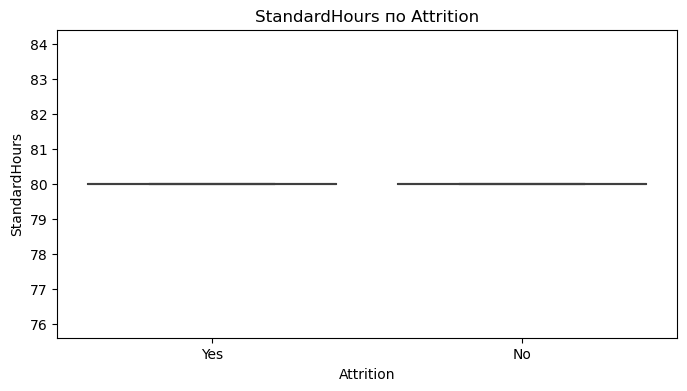

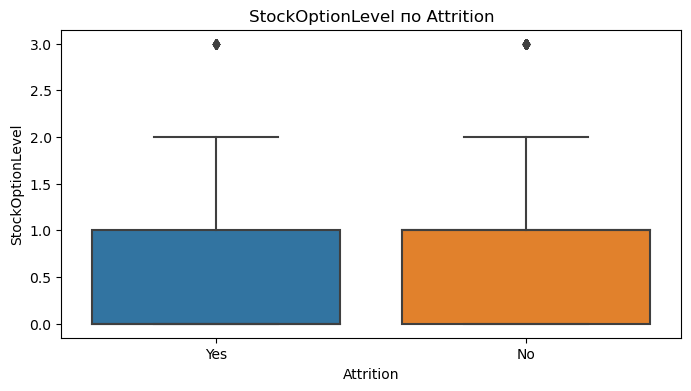

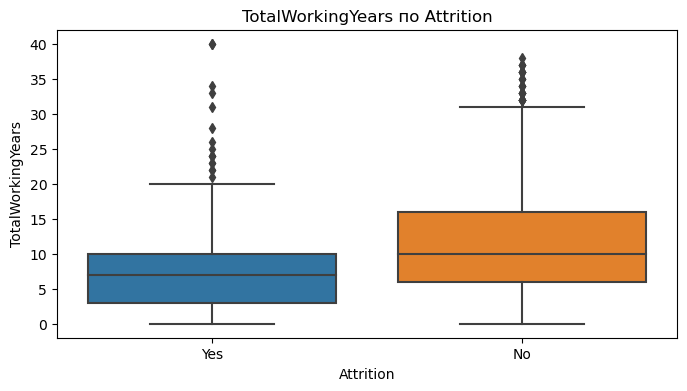

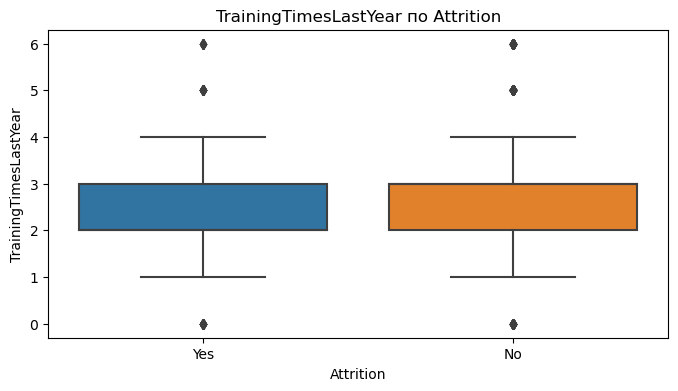

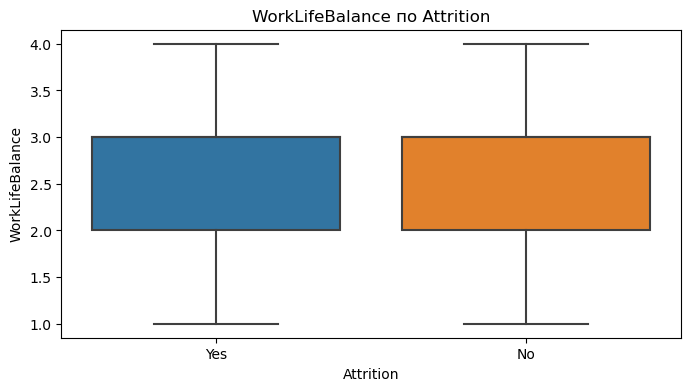

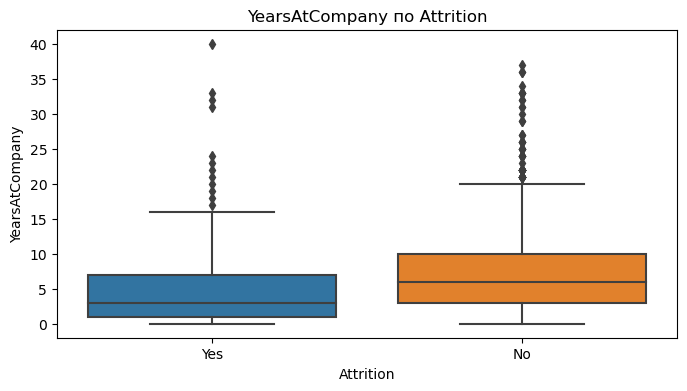

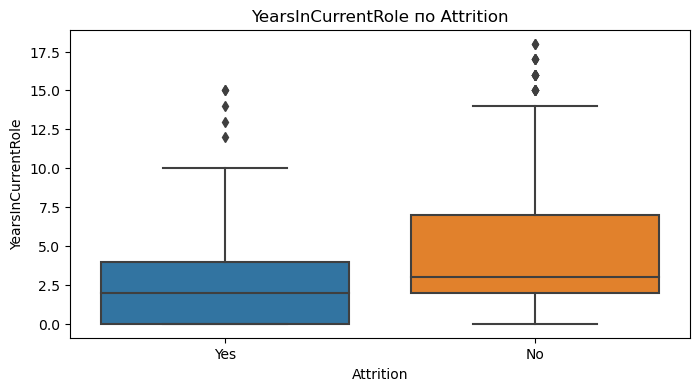

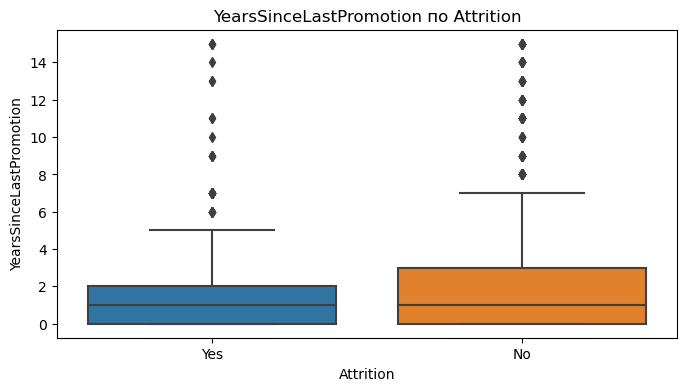

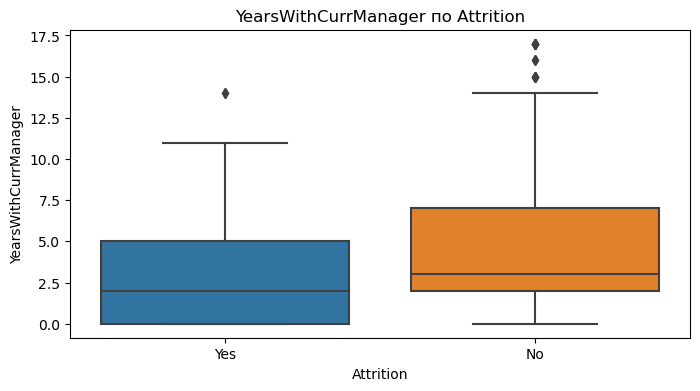

In [18]:
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Attrition', y=feature, data=data)
    plt.title(f'{feature} по Attrition')
    plt.show()

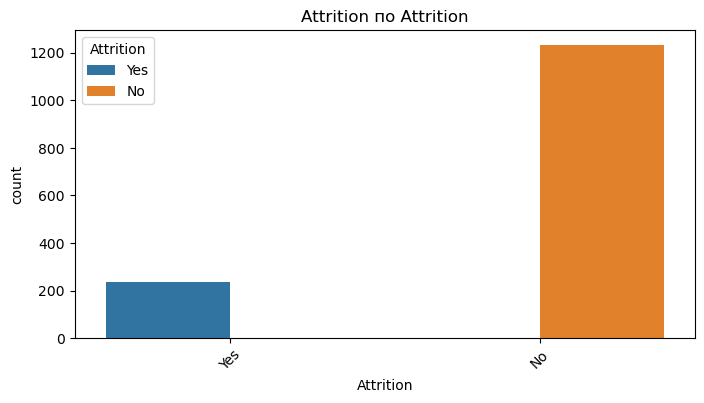

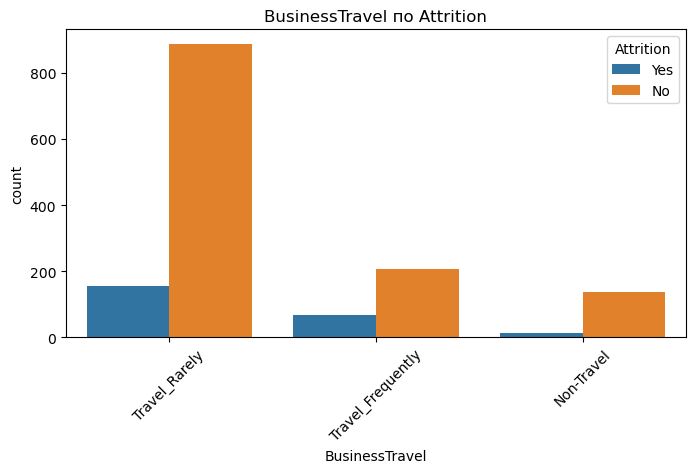

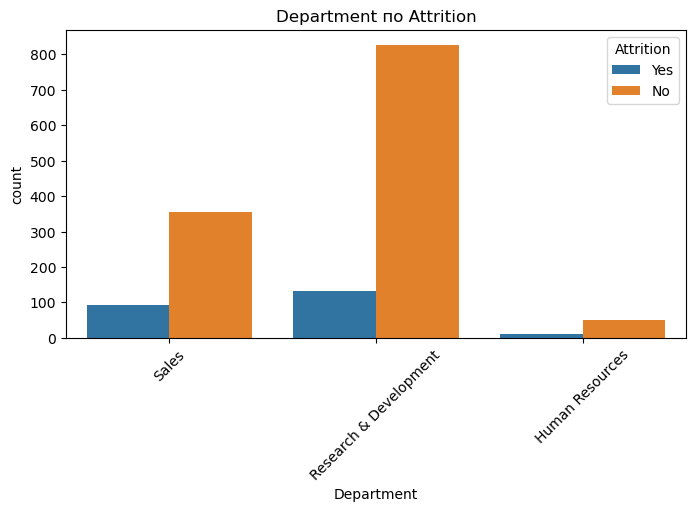

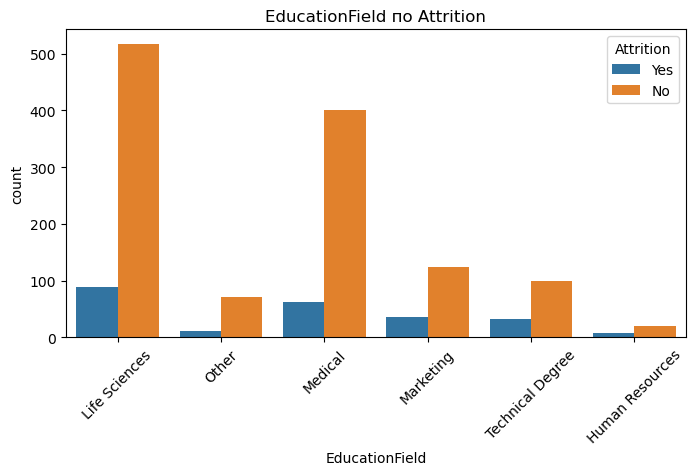

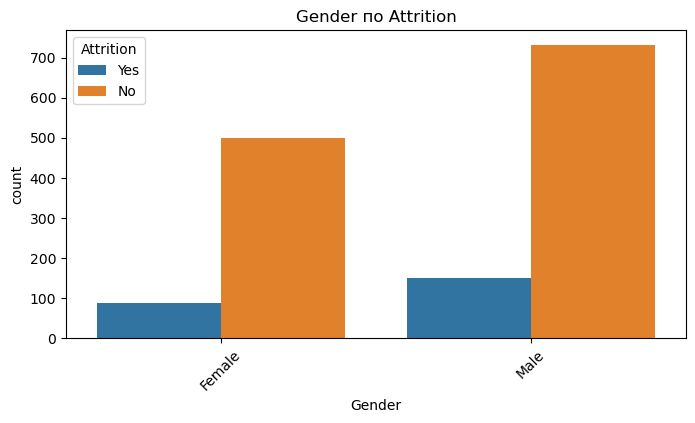

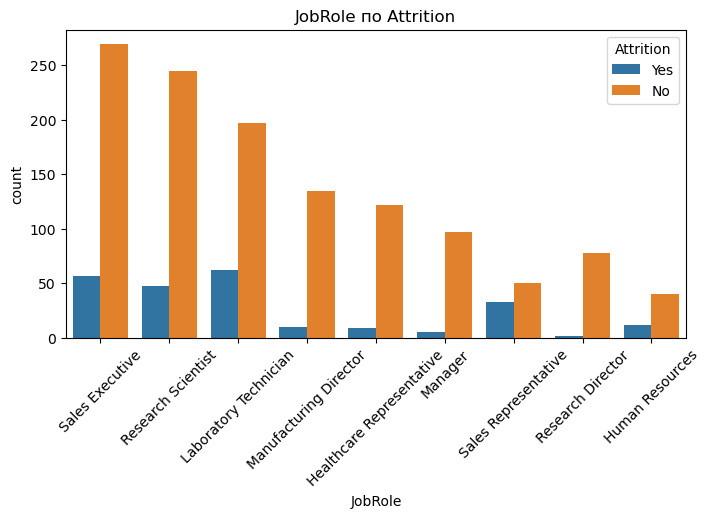

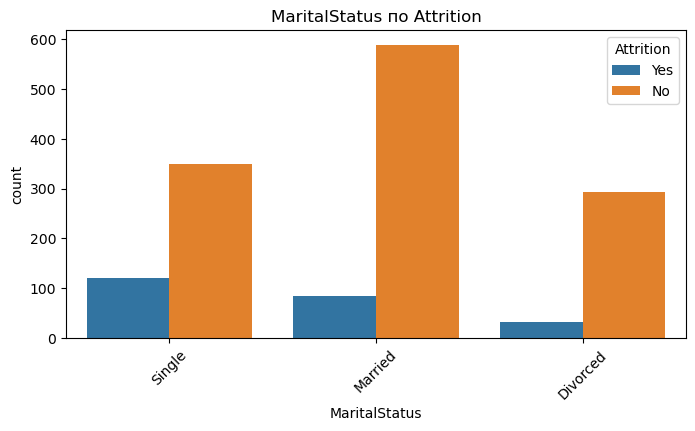

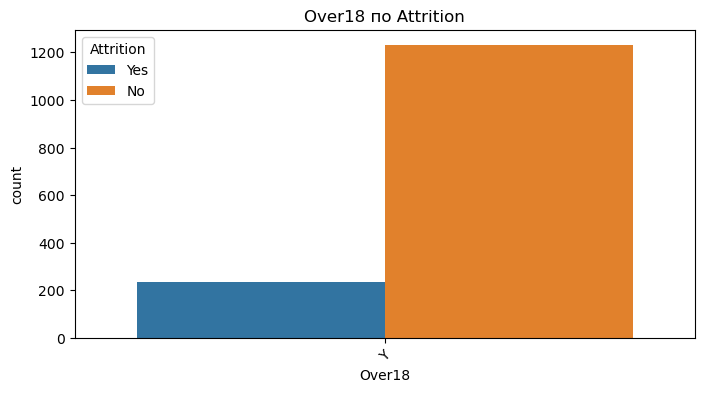

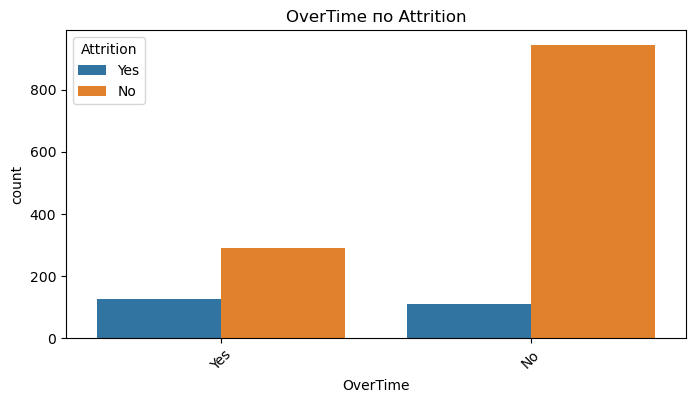

In [11]:
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='Attrition', data=data)
    plt.title(f'{feature} по Attrition')
    plt.xticks(rotation=45)
    plt.show()

Шаг 6: Корреляционный анализ

Корреляция признаков с 'attrition_num':
 attrition_num               1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    N

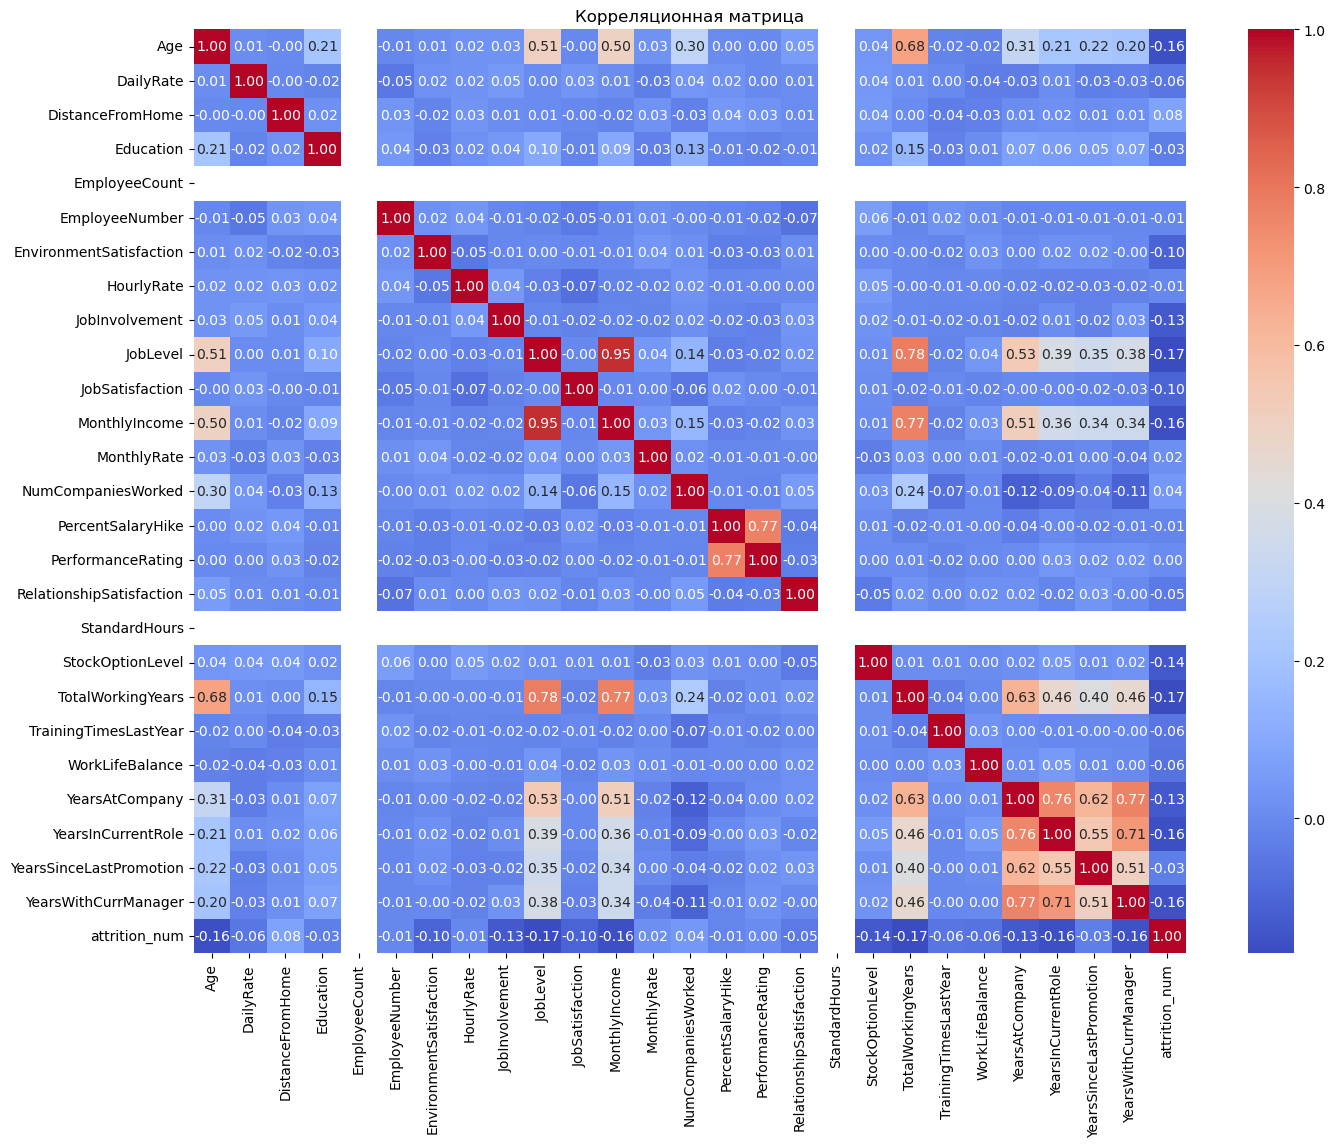

In [23]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_features.corr()

attrition_corr = corr_matrix['attrition_num'].sort_values(ascending=False)
print("Корреляция признаков с 'attrition_num':\n", attrition_corr)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Шаг 7: Взаимосвязи между признаками

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


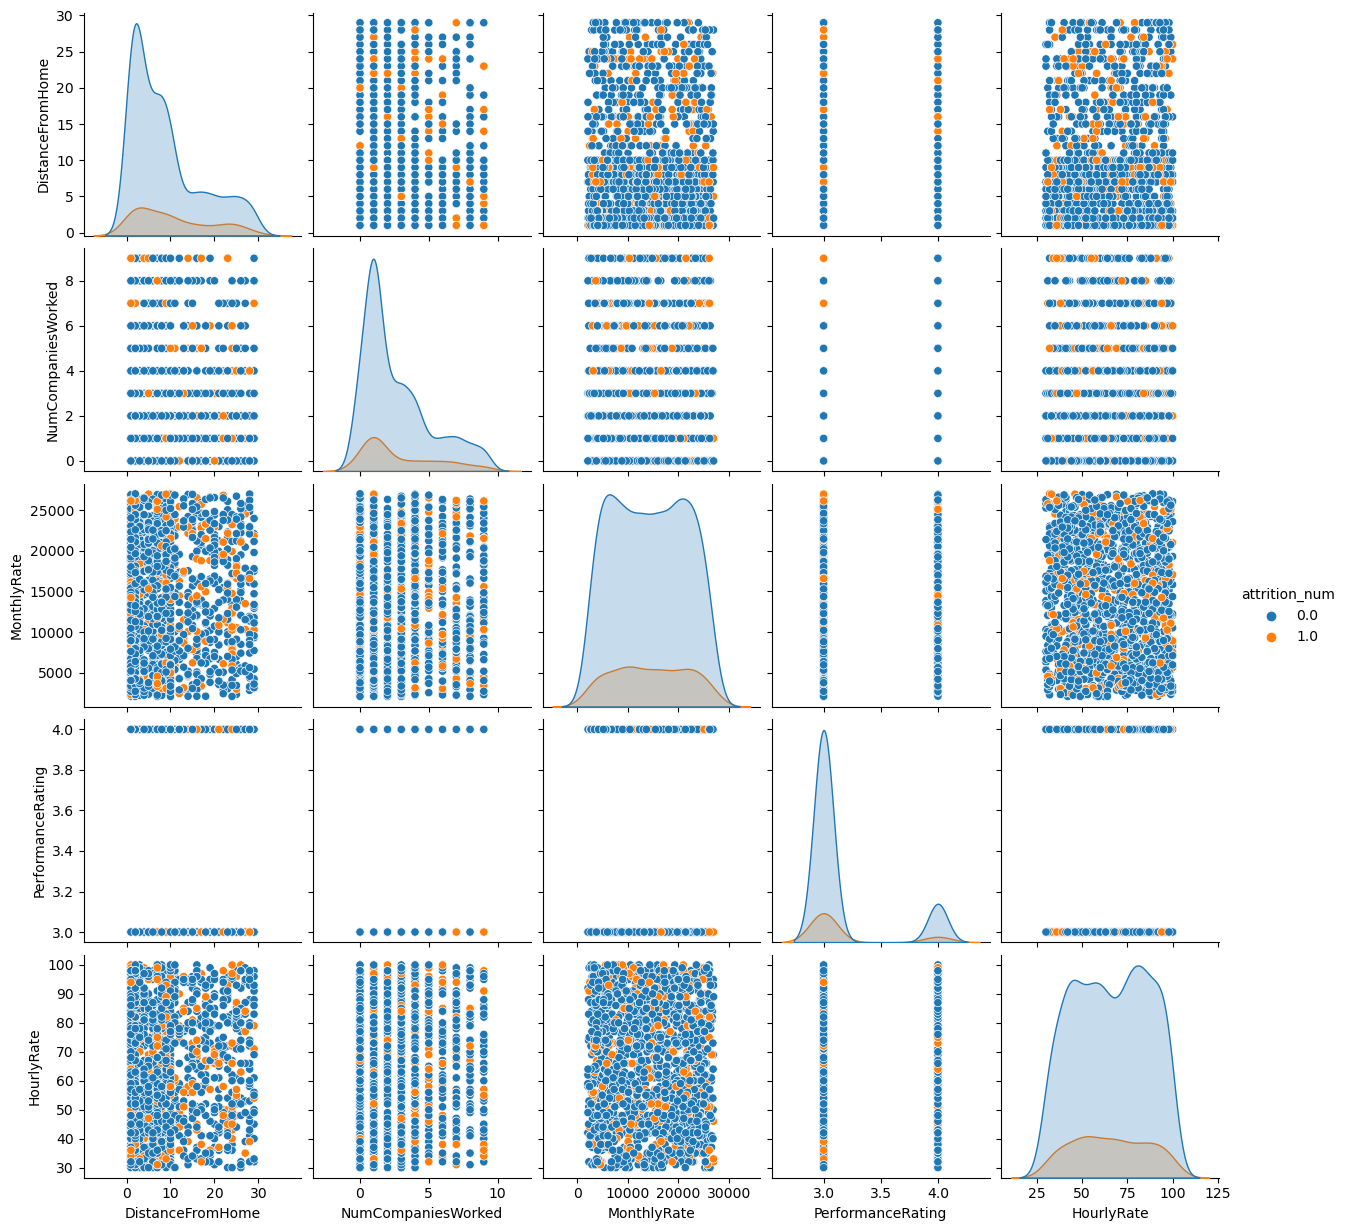

In [21]:
top_features = attrition_corr.index[1:6]
sns.pairplot(data[top_features.tolist() + ['attrition_num']], hue='attrition_num')
plt.show()

Шаг 8: Выявление выбросов

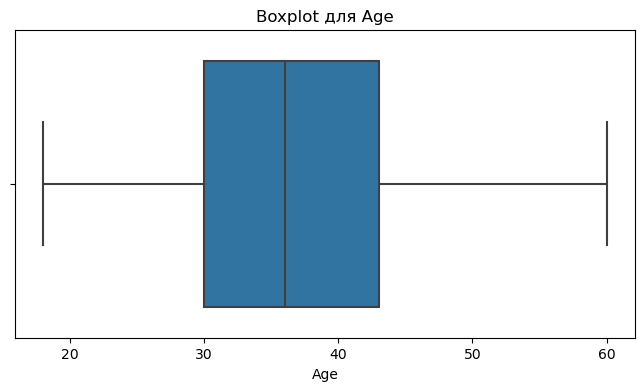

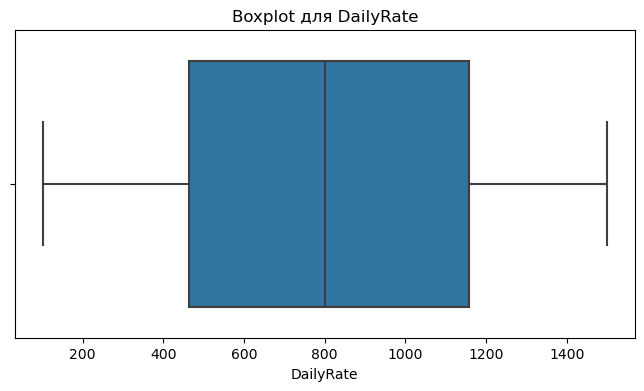

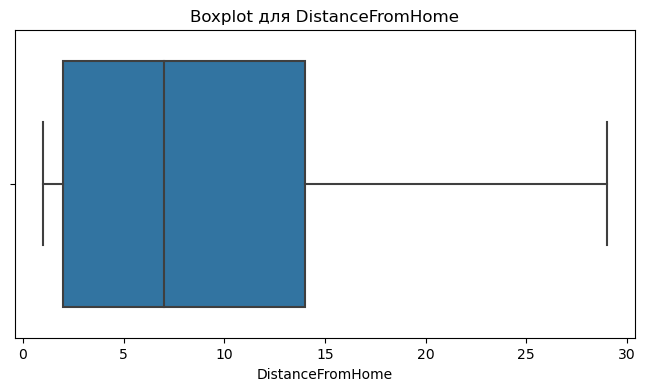

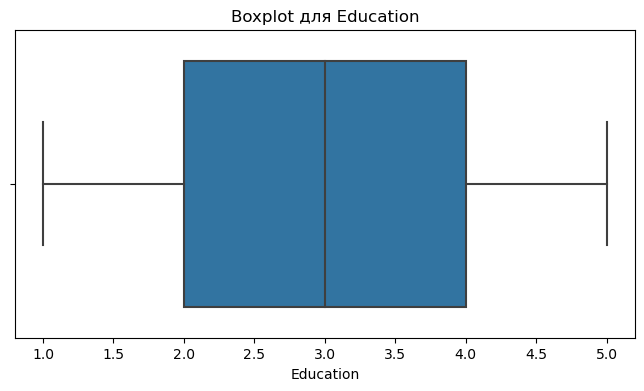

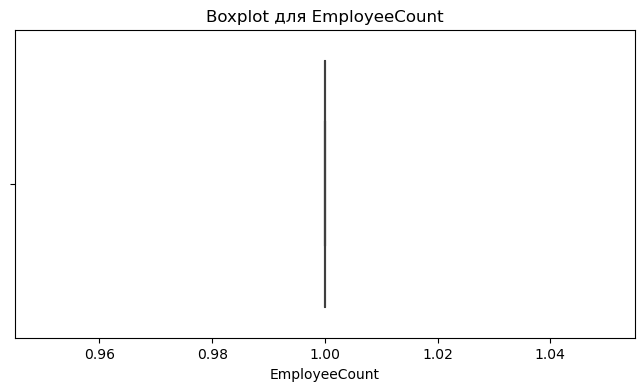

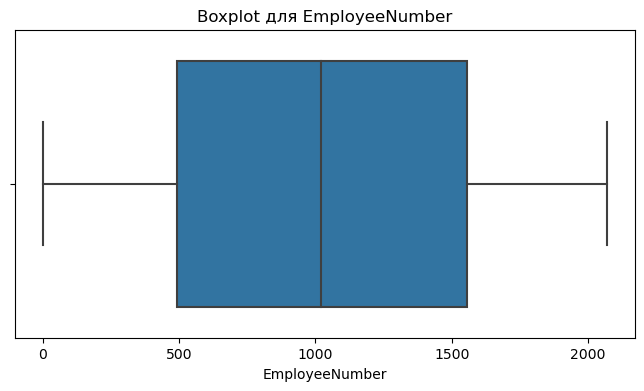

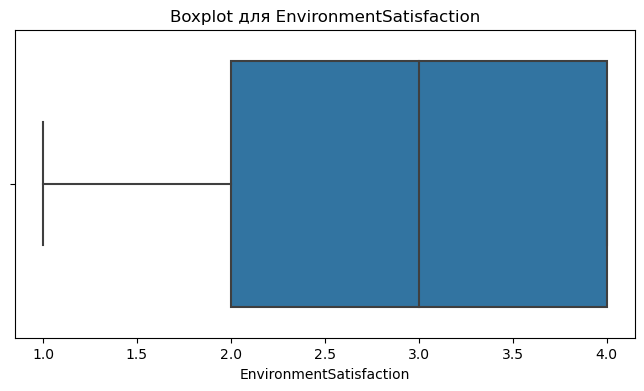

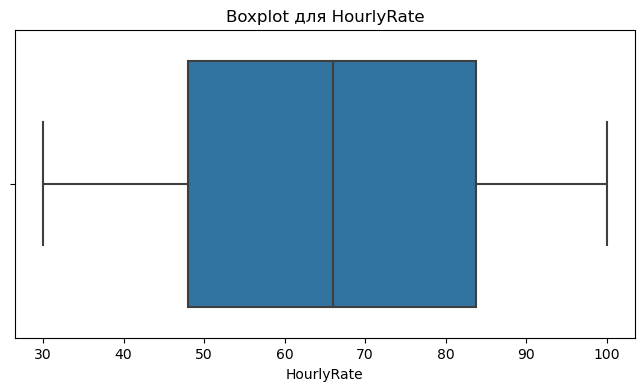

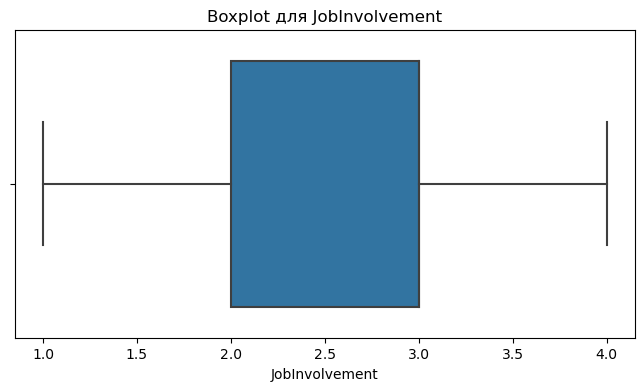

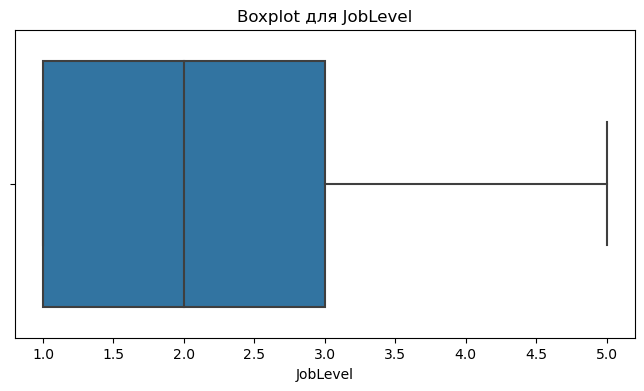

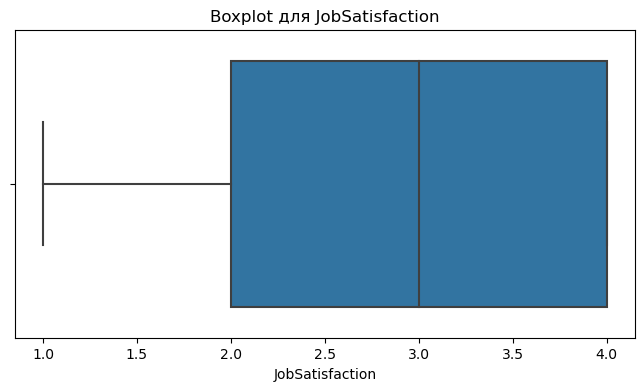

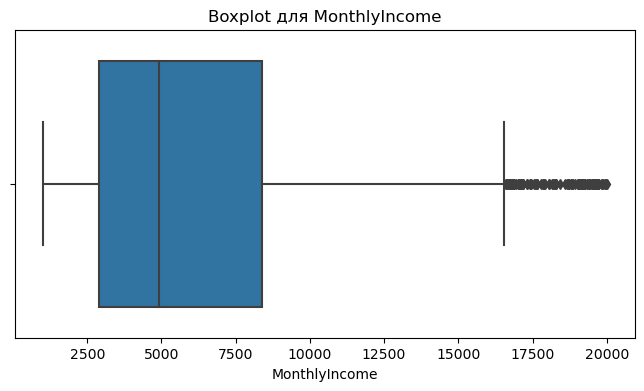

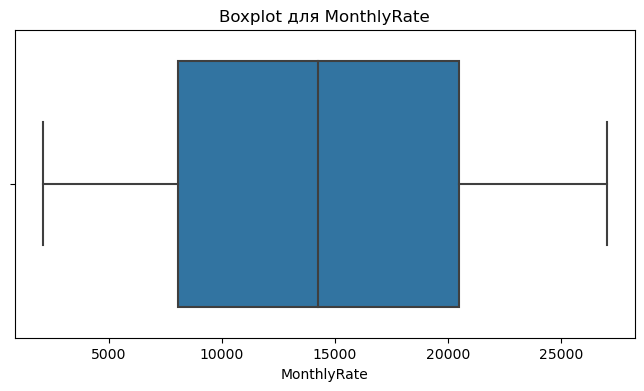

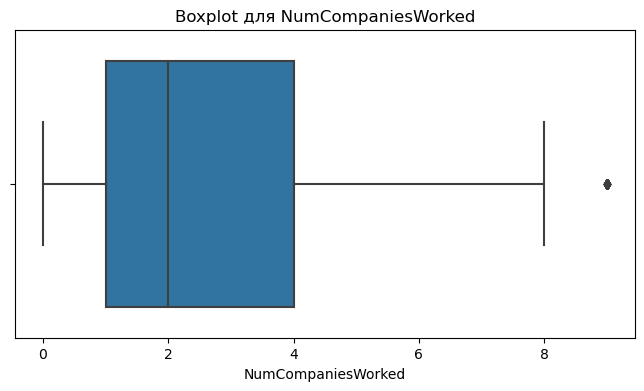

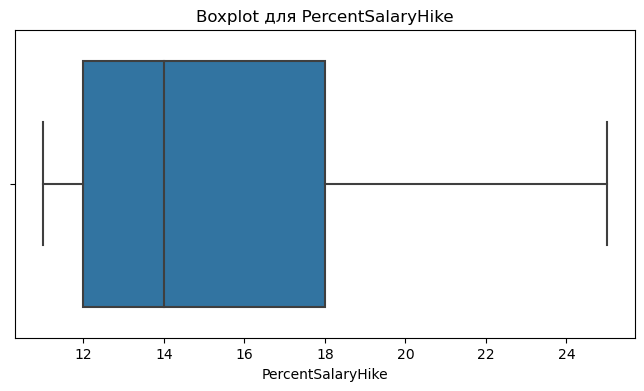

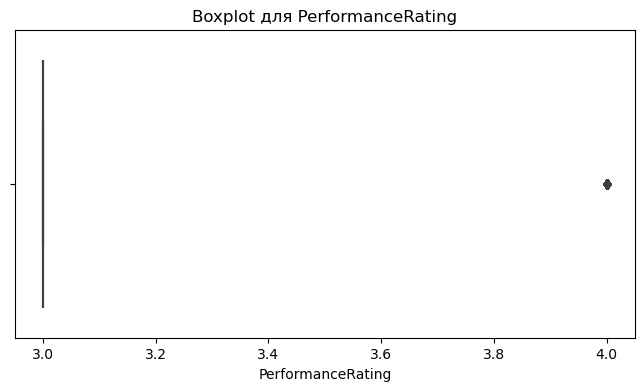

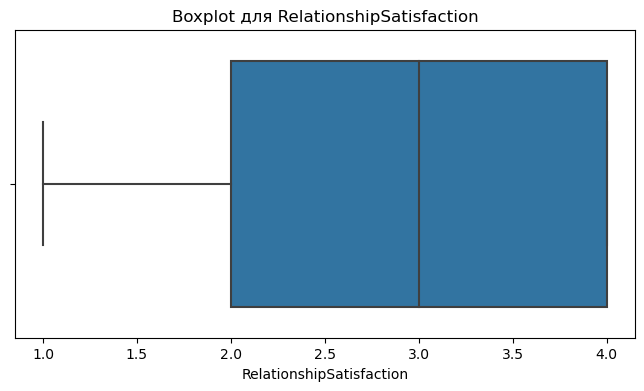

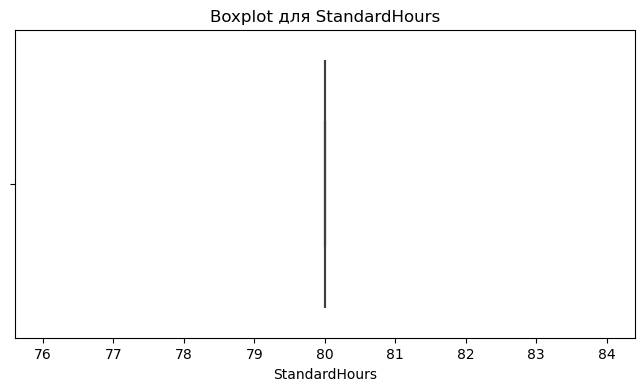

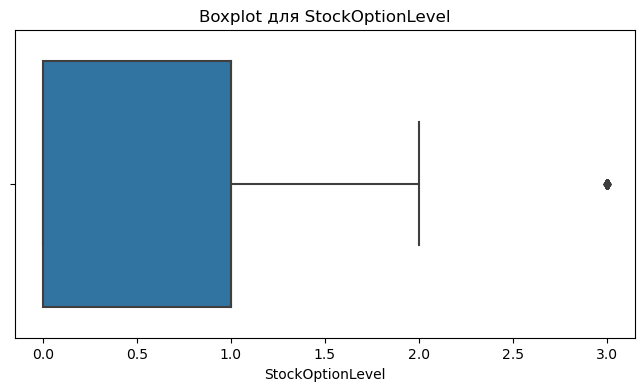

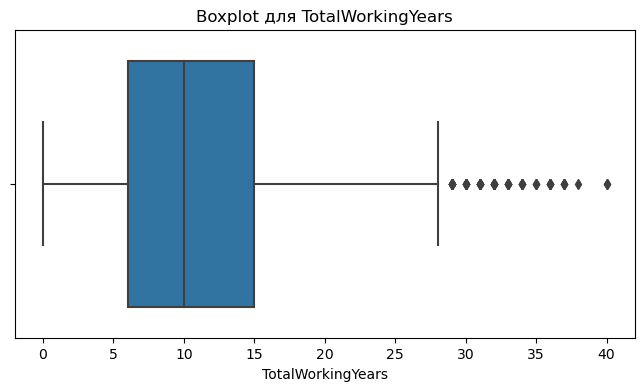

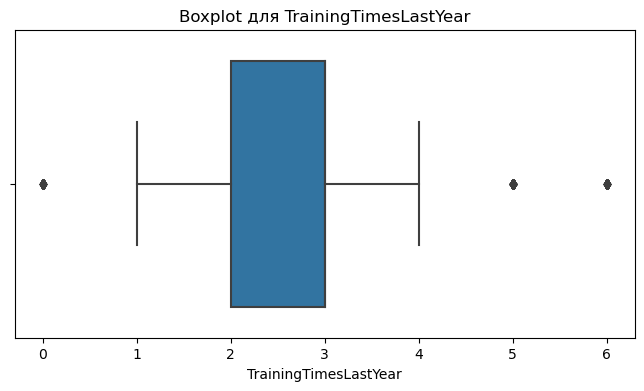

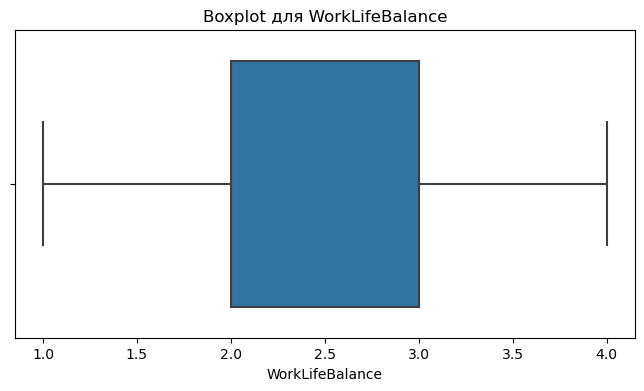

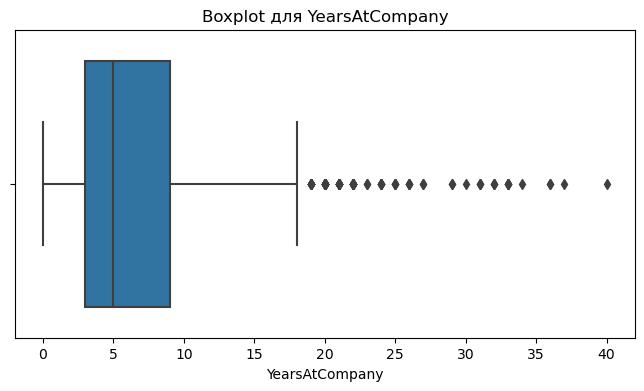

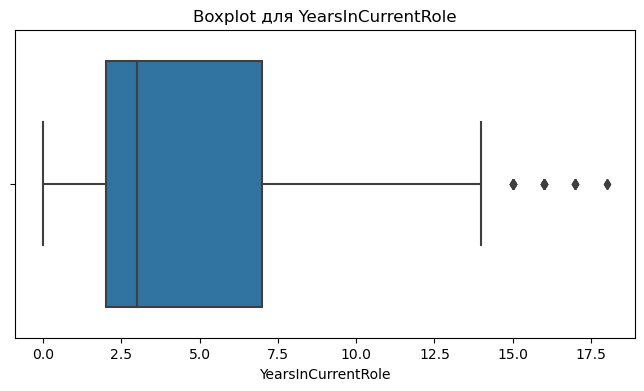

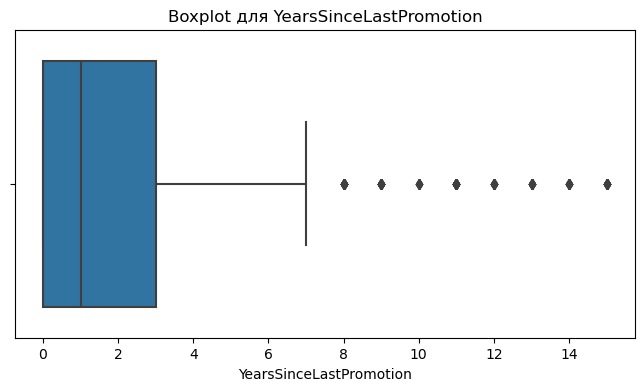

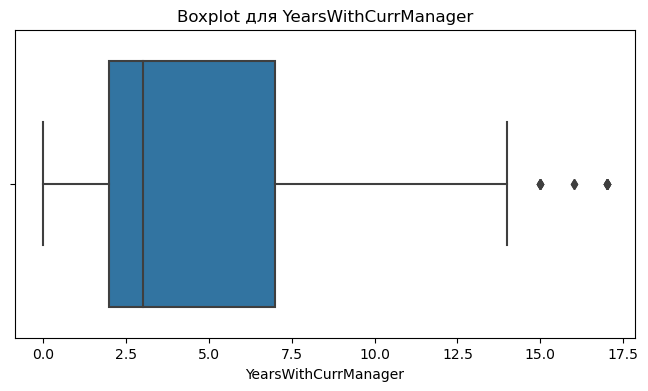

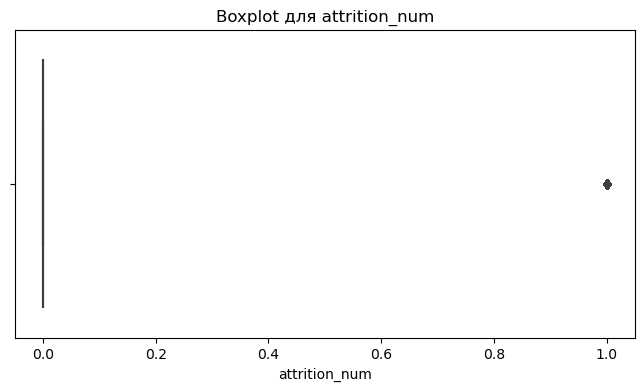

In [22]:
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot для {feature}')
    plt.show()